In [1]:
from processing import msevn
import os
import pandas as pd
import numpy as np

msevn.configure_mpl()

In [2]:
root = './matlab/output/flat_aboba'

files = os.listdir(root)
files

['plane_64edge_3d_relative_80wlen_30radius_0.0nonreg_1planes_30deg_theta0_0deg_phi0_TEpol_80wav_800bw_xz_only.mat',
 'plane_64edge_3d_relative_80wlen_30radius_0.0nonreg_3planes_30deg_theta0_0deg_phi0_TEpol_80wav_800bw_xz_only.mat']

In [3]:
xz1 = msevn.MstmEngine(os.path.join(root, files[1]))



In [29]:
from PIL import Image

field = xz1.field / xz1.field.max() * 255

im = Image.fromarray(np.uint8(field))
im = im.rotate(-60, Image.NEAREST, expand = 1)

width, height = im.size
im = im.crop((width * 0.2, height * 0.2, width * 0.8, height * 0.8))
arr = np.array(im)

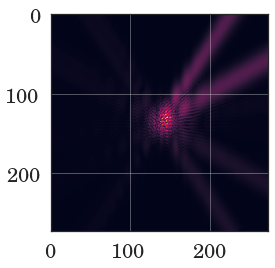

In [30]:
import matplotlib.pyplot as plt

plt.imshow(arr)

In [65]:
from scipy.interpolate import interp1d
from scipy import integrate

y = np.sqrt(arr[:, 137]) / np.sqrt(arr[:, 137]).max()
x = np.array(range(arr.shape[0]))

fx = interp1d(x, y, kind='quadratic')

In [107]:
def fresnel_diff_int(x, z, interpf, xpmin, xpmax, wlen = 80):
    res = []
    for xs in x:
        rho = lambda s: (xs - s) ** 2 / (2 * z) + z
        resf = lambda s: np.abs(interpf(s) * np.exp(complex(0, rho(s) * 2*np.pi/wlen)) * z / rho(s) ** 2)
        ii = integrate.quad(resf, xpmin, xpmax)
        res.append(ii[0])
    return res


In [116]:
fresint = fresnel_diff_int(np.linspace(x.min(), x.max(), 400), 0.5, fx, x.min(), x.max())

/tmp/ipykernel_100350/1082320181.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ii = integrate.quad(resf, xpmin, xpmax)


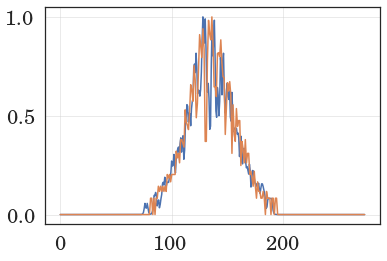

In [118]:
iss = 1
ar2 = y = np.sqrt(arr[:, 137 + iss]) / np.sqrt(arr[:, 137 + iss]).max()

plt.plot(np.linspace(x.min(), x.max(), 400), np.array(fresint) / max(fresint))
plt.plot(x, ar2)